In [213]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import time

# CNN and some aux function have been obtained from: https://www.kaggle.com/code/shadabhussain/cifar-10-cnn-using-pytorch

In [3]:
torch.cuda.is_available()

True

In [4]:
# Load CIFAR-100 dataset from local files
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Function to load data from multiple batches
def load_data_from_batches(batch_files):
    images = []
    labels = np.array([])
    for file in batch_files:
        batch = unpickle(file)
        #print(batch)
        batch_images = batch[b'data']
        batch_images = batch_images.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)
        images.append(batch_images)
        labels = np.append(labels, batch[b'labels'])
    return np.vstack(images), labels.astype(np.int64)

In [5]:
data_batch_files = [f'../paul/data/cifar-10-batches-py/{batch}' for batch in ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']]

x_train, y_train = load_data_from_batches(data_batch_files)

with open('../paul/data/cifar-10-batches-py/test_batch', 'rb') as file:
    test_batch = pickle.load(file, encoding='bytes')
    x_test = test_batch[b'data'].reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)
    y_test = np.array(test_batch[b'labels'])

with open('../paul/data/cifar-10-batches-py/batches.meta', 'rb') as file:
    batch = pickle.load(file, encoding='bytes')
    label_names = batch[b'label_names']

# Converting to Tensors

In [6]:
# Convert to tensor
x_train = torch.tensor(x_train, dtype=torch.uint8)
x_train = x_train.permute(0, 3, 1, 2)

# Convert to tensor
x_test = torch.tensor(x_test, dtype=torch.uint8)
x_test = x_test.permute(0, 3, 1, 2)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)

In [7]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Train unique classes: {np.unique(y_train)}\nVal unique classes: {np.unique(y_val)}\nTest unique classes: {np.unique(y_test)}")
print(f"Corresponding labels: {label_names}")

x_train shape: torch.Size([45000, 3, 32, 32])
y_train shape: (45000,)
x_val shape: torch.Size([5000, 3, 32, 32])
y_val shape: (5000,)
x_test shape: torch.Size([10000, 3, 32, 32])
y_test shape: (10000,)
Train unique classes: [0 1 2 3 4 5 6 7 8 9]
Val unique classes: [0 1 2 3 4 5 6 7 8 9]
Test unique classes: [0 1 2 3 4 5 6 7 8 9]
Corresponding labels: [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


Label:  b'frog' (6)


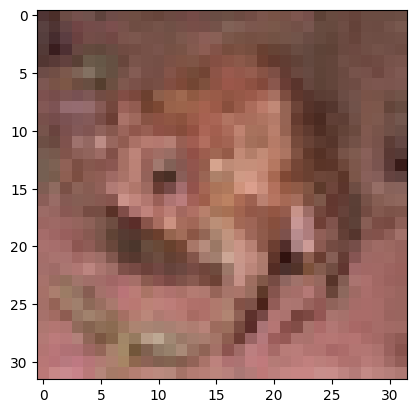

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', label_names[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

index = 5
show_example(x_train[index], y_train[index])

 # Data Augmentation

In [10]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [55]:
# Example augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomGamma(gamma_limit=(80, 120), eps=None, always_apply=False, p=0.5),
    A.RandomBrightnessContrast (p=0.7),
    #A.CLAHE(clip_limit=1.0, tile_grid_size=(1, 1), always_apply=False, p=0.2),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=45, p=1),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=1),
    #A.CoarseDropout(max_holes=1, max_height=8, max_width=8, min_holes=1, min_height=8, min_width=8, p=0.5),
    #A.RandomCrop(width=32, height=32),
    ToTensorV2(),
])

C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\1679210230.py:4: UserWarning: Argument 'eps' is not valid and will be ignored.
  A.RandomGamma(gamma_limit=(80, 120), eps=None, always_apply=False, p=0.5),


In [247]:
# Convert the images tensor to a NumPy array
images_np = x_train.permute(0, 2, 3, 1).numpy()

augmented_images = []
augmented_labels = []
number_of_augmented_images = 5

start_time = time.time()

# Apply augmentations and collect augmented images and labels
for idx, (img, label) in enumerate(zip(images_np, y_train)):
    if idx < np.inf:
        if idx % 1000 == 0:
            print(f"index: {idx}")
        for _ in range(number_of_augmented_images):  # Create 3 augmented versions of each image
            augmented = transform(image=img)
            augmented_images.append(augmented['image'])
            augmented_labels.append(label)

end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.4f} seconds")

index: 0
index: 1000
index: 2000
index: 3000
index: 4000
index: 5000
index: 6000
index: 7000
index: 8000
index: 9000
index: 10000
index: 11000
index: 12000
index: 13000
index: 14000
index: 15000
index: 16000
index: 17000
index: 18000
index: 19000
index: 20000
index: 21000
index: 22000
index: 23000
index: 24000
index: 25000
index: 26000
index: 27000
index: 28000
index: 29000
index: 30000
index: 31000
index: 32000
index: 33000
index: 34000
index: 35000
index: 36000
index: 37000
index: 38000
index: 39000
index: 40000
index: 41000
index: 42000
index: 43000
index: 44000
Execution time: 117.8963 seconds


In [255]:
# Convert the lists of augmented images and labels to tensors
augmented_images_tensor = torch.stack(augmented_images)

# Combine the original and augmented datasets
combined_images_tensor = torch.cat((x_train, augmented_images_tensor), dim=0)
combined_labels = np.append(y_train, augmented_labels)

print(combined_images_tensor.shape)  # Should output torch.Size([40000, 3, 32, 32])
print(combined_labels.shape)  # Should output torch.Size([40000])

torch.Size([270000, 3, 32, 32])
(270000,)


# Drawing Augmented Images

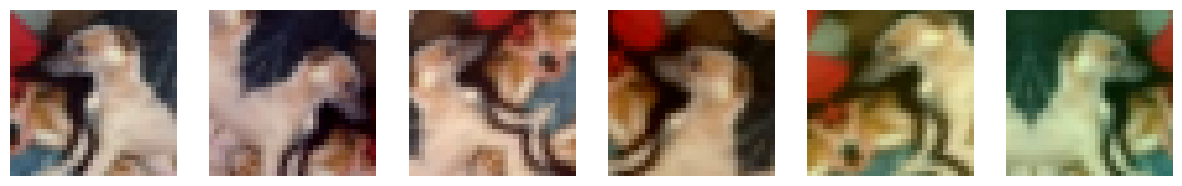

In [256]:
original_image_index = 25

indices = [original_image_index]

base_index = x_train.shape[0] + original_image_index * number_of_augmented_images
for i in range(number_of_augmented_images):
    indices.append(base_index + i)

# Extract the images based on the provided indices
selected_images = combined_images_tensor[indices]

# Plot the images side by side
fig, axes = plt.subplots(1, len(indices), figsize=(15, 5))
for ax, img in zip(axes, selected_images):
    # Permute the image tensor from (3, 32, 32) to (32, 32, 3) for plotting
    img = img.permute(1, 2, 0)
    ax.imshow(img)
    ax.axis('off')

plt.show()

## Smaller training set

In [257]:
num_classes = 10
images_per_class = 100

# List to store indices of the selected images
selected_indices = []

# Loop over each class
for class_idx in range(num_classes):
    # Get indices of all images of the current class
    class_indices = (combined_labels == class_idx).nonzero()[0]
    # Select the first 100 indices (or all if less than 100 are available)
    selected_indices.extend(class_indices[:images_per_class].tolist())

# Create tensors for the selected images and labels
selected_images_tensor = combined_images_tensor[selected_indices]
selected_labels = combined_labels[selected_indices]

print(selected_images_tensor.shape)  # Should output torch.Size([1000, 3, 32, 32])
print(selected_labels.shape)

torch.Size([1000, 3, 32, 32])
(1000,)


# Train & Validation Split

In [258]:
random_seed = 42
torch.manual_seed(random_seed);

In [259]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = torch.tensor(x_data, dtype=torch.float32)
        self.y_data = torch.tensor(y_data, dtype=torch.long)  # Assuming y_data are labels and should be long integers

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]  # Change dimensions to (3, 32, 32) if necessary
        y = self.y_data[idx]
        return x, y

# Original training set
#train_ds = CustomDataset(x_train, y_train) 

# Training + Augmented
train_ds = CustomDataset(combined_images_tensor, combined_labels)

# Small subset of training set
#train_ds = CustomDataset(selected_images_tensor, selected_labels)

# Validation set is the same for all
val_ds = CustomDataset(x_val, y_val)

print(f"train_ds shape: {train_ds.x_data.shape}")
print(f"val_ds shape: {val_ds.x_data.shape}")

C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\1471021754.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x_data = torch.tensor(x_data, dtype=torch.float32)


train_ds shape: torch.Size([270000, 3, 32, 32])
val_ds shape: torch.Size([5000, 3, 32, 32])


In [260]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [261]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, pin_memory=True)

In [262]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        images = torch.tensor(images, dtype=torch.int32)
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\3601700830.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images, dtype=torch.int32)


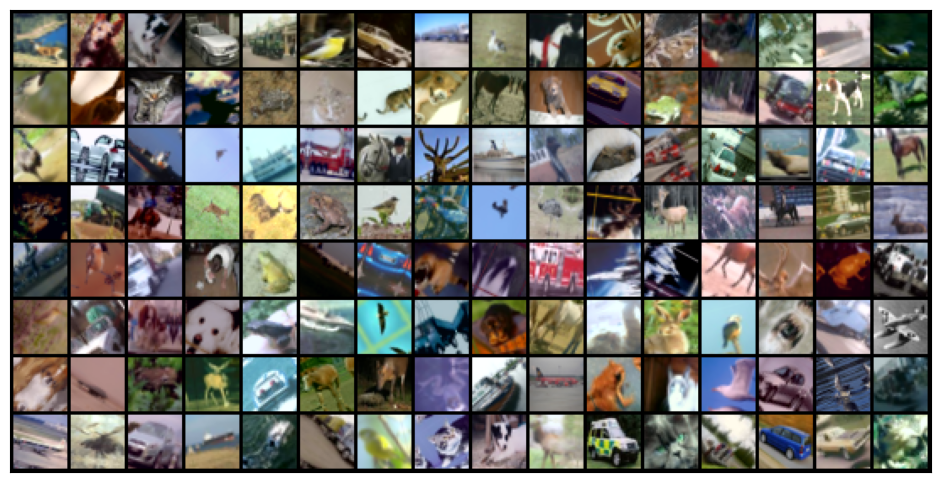

In [263]:
show_batch(train_dl)

# CNN

In [264]:
import torch.nn as nn
import torch.nn.functional as F

In [265]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [266]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [267]:
# With Dropout
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16
            nn.Dropout(0.25),  # Add dropout

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.Dropout(0.25), 

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.Dropout(0.25), 

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Dropout(0.5), 
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.5), 
            nn.Linear(512, 10)
        )
        
    def forward(self, xb):
        return self.network(xb)

In [268]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.25, inplace=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Dropout(p=0.25, inplace=False)
    (18): Flatten(start_di

In [269]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.3552, -0.0499,  0.2207, -0.0134, -0.2845, -0.0417,  0.0024,  0.0381,
         0.0877,  0.1336], grad_fn=<SelectBackward0>)


In [270]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [271]:
device = get_default_device()
device

device(type='cuda')

In [272]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [274]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(history, epochs, lr, model, train_loader, val_loader, weight_decay, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr, weight_decay=weight_decay)
    total_batches = len(train_loader)
    history_length = len(history)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for i, batch in enumerate(train_loader):
            if i % (total_batches // 10) == 0:
                print(f"Batch: {i}/{total_batches}")
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch + history_length, result)
        history.append(result)
    return history

In [275]:
model = to_device(Cifar10CnnModel(), device)
# model.load_state_dict(torch.load('models/cnn-no-augmentation-20-epochs.pth'))

In [276]:
evaluate(model, val_dl)

{'val_loss': 2.302942991256714, 'val_acc': 0.10356158018112183}

In [296]:
num_epochs = 3
opt_func = torch.optim.Adam
lr = 0.00001
weight_decay = 0.0001
# new_lr = old_lr * new_bs / old_bs

In [278]:
history = []

In [300]:
start_time = time.time()
history = fit(history, num_epochs, lr, model, train_dl, val_dl, weight_decay, opt_func)
end_time = time.time()

elapsed_time = end_time - start_time

print(f"Execution time: {elapsed_time:.4f} seconds")

Batch: 0/2110
Batch: 211/2110
Batch: 422/2110
Batch: 633/2110
Batch: 844/2110
Batch: 1055/2110
Batch: 1266/2110
Batch: 1477/2110
Batch: 1688/2110
Batch: 1899/2110
Epoch [28], train_loss: 0.1902, val_loss: 0.4369, val_acc: 0.8807
Batch: 0/2110
Batch: 211/2110
Batch: 422/2110
Batch: 633/2110
Batch: 844/2110
Batch: 1055/2110
Batch: 1266/2110
Batch: 1477/2110
Batch: 1688/2110
Batch: 1899/2110
Epoch [29], train_loss: 0.1883, val_loss: 0.4324, val_acc: 0.8819
Batch: 0/2110
Batch: 211/2110
Batch: 422/2110
Batch: 633/2110
Batch: 844/2110
Batch: 1055/2110
Batch: 1266/2110
Batch: 1477/2110
Batch: 1688/2110
Batch: 1899/2110
Epoch [30], train_loss: 0.1832, val_loss: 0.4290, val_acc: 0.8819
Execution time: 872.3903 seconds


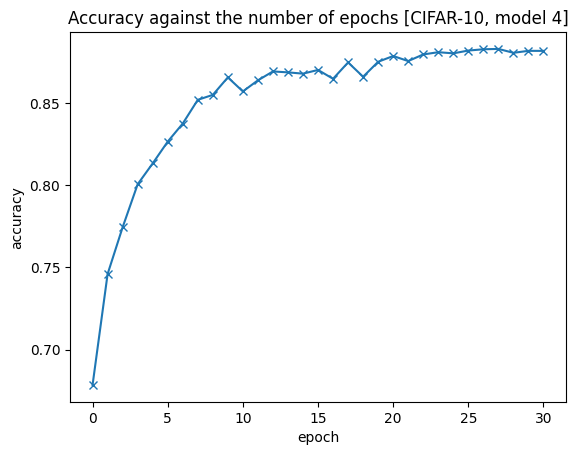

In [301]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy against the number of epochs [CIFAR-10, model 4]');

plot_accuracies(history)

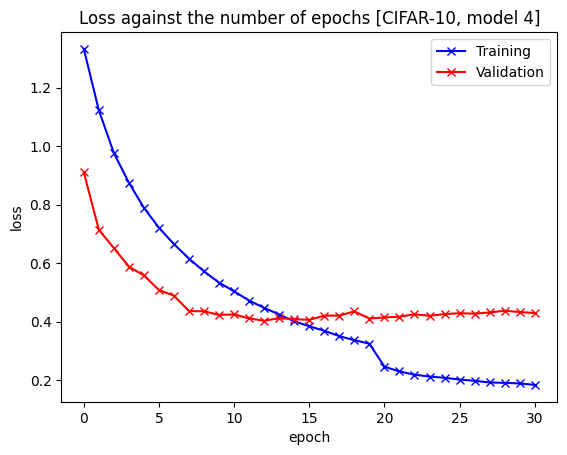

In [302]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss against the number of epochs [CIFAR-10, model 4]');

plot_losses(history)

# Testing Performance

In [292]:
test_dataset = CustomDataset(x_test, y_test)

C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\1471021754.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x_data = torch.tensor(x_data, dtype=torch.float32)


In [293]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return label_names[preds[0].item()]

Label: b'frog' , Predicted: b'frog'


C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\1657175047.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(img, dtype=torch.int32)


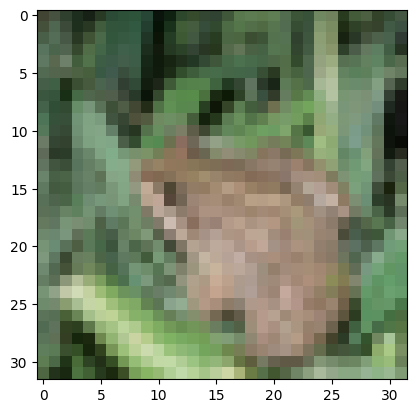

In [294]:
img, label = test_dataset[4]
prediction = predict_image(img, model)
img = torch.tensor(img, dtype=torch.int32)
plt.imshow(img.permute(1, 2, 0))
print('Label:', label_names[label], ', Predicted:', prediction)

In [295]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4490847587585449, 'val_acc': 0.8833984136581421}

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model.eval()

# Initialize lists to store true labels and predictions
all_preds = []
all_labels = []

# Disable gradient computation for efficiency
with torch.no_grad():
    for batch in test_loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        
        # Get model predictions
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        # Append predictions and true labels to lists
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving Model

In [287]:
torch.save(model.state_dict(), 'models/cnn-5aug-15-epochs-dropout.pth')

In [46]:
model2 = to_device(Cifar10CnnModel(), device)

In [47]:
model2.load_state_dict(torch.load('models/cnn-2aug-20-epochs.pth'))

C:\Users\rcn\AppData\Local\Temp\ipykernel_11308\3736831561.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('models/cnn-2aug-20-epochs.p

<All keys matched successfully>

In [48]:
evaluate(model2, test_loader)

{'val_loss': 1.1772582530975342, 'val_acc': 0.7558346390724182}